<a href="https://colab.research.google.com/github/DianaCamacho0/Diana-Camacho---Modelos/blob/main/Semana3/TallerRedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELOS PREDICTIVOS PARA SISTEMAS INTELIGENTES

## Taller Bosques Aleatorios

Usando el dataset heart.csv desarrollar un sistema de predicción que permita determinar si un paciente tiene una enfermedad cardíaca.

El data set tiene las siguientes variables independientes:

* age (edad)
* sex (sexo)
* chest pain type (tipo de dolor en el pecho)
* resting blood pressure (presión arterial en reposo)
* serum cholestoral in mg/dl (colesterol)
* fasting blood sugar > 120 mg/dl (nivel de azucar en sangre en ayunas)
* resting electrocardiographic results (values 0,1,2) (electrocardiograma en reposo)
* maximum heart rate achieved (frecuencia cardíaca máxima)
* exercise induced angina (angina provocada por ejercicio)
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment (depresión del ST inducida por el ejercicio respecto al reposo)
* number of major vessels (0-3) colored by flourosopy (número de vasos principales coloreados)
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect (talasemia detectada)

La variable dependiente o target es:

* Enfermedad cardíaca (valor = 0 NO, valor = 1 SI)

Realizar el ajuste del modelo, usando el 80% de los datos en el entrenamiento y el 20% para test, además obtener el accuracy general del sistema de predicción.

Guarde el modelo con extensión .h5

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfdata = pd.read_csv("heart.csv")
dfdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
print(dfdata.tail())
print(dfdata.count())
print(dfdata.describe())


      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  
age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64
               age          sex           cp     trestbps        chol  \
count  1025.000000  1

In [4]:
dfdata.target.unique()

array([0, 1])

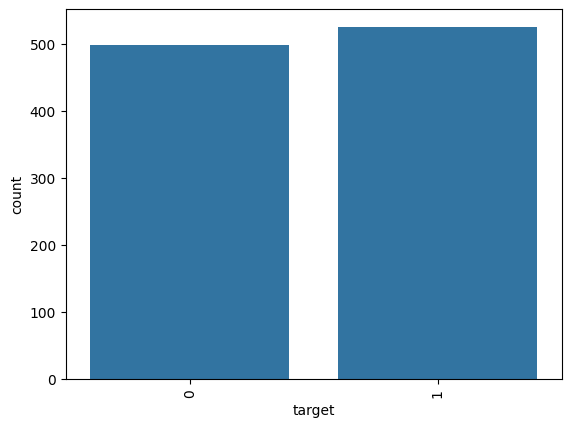

In [5]:
sns.countplot(x='target',data=dfdata)
plt.xticks(x=dfdata['target'],rotation='vertical')
plt.show()

In [6]:
dfdata[dfdata['target']==0].count()

,0
age,499
sex,499
cp,499
trestbps,499
chol,499
fbs,499
restecg,499
thalach,499
exang,499
oldpeak,499


In [7]:
from sklearn.model_selection import train_test_split
X = dfdata.drop('target', axis=1)
Y = dfdata['target']

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.asarray(ytrain).reshape(-1,1))

y_train = enc.transform(np.asarray(ytrain).reshape(-1,1)).toarray()
y_test = enc.transform(np.asarray(ytest).reshape(-1,1)).toarray()

ytrain

,target
835,0
137,1
534,1
495,1
244,1
...,...
700,1
71,0
106,0
270,1


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(256,input_shape=(xtrain.shape[1],),activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2,activation='softmax'))


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,242 (508.76 KB)

 Trainable params: 130,242 (508.76 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history = model.fit(xtrain,y_train,epochs=10,batch_size=32,verbose=1,validation_split=0.1)


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4863 - loss: 1.0388 - val_accuracy: 0.5122 - val_loss: 0.7050
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5047 - loss: 0.7477 - val_accuracy: 0.6341 - val_loss: 0.6792
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5716 - loss: 0.7017 - val_accuracy: 0.5976 - val_loss: 0.6853
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5444 - loss: 0.7058 - val_accuracy: 0.6098 - val_loss: 0.6727
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6097 - loss: 0.6631 - val_accuracy: 0.6585 - val_loss: 0.6506
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6474 - loss: 0.6449 - val_accuracy: 0.6220 - val_loss: 0.6304
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6476 - loss: 0.6455 - val_accuracy: 0.6463 - val_loss: 0.6214
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6415 - loss: 0.6504 - val_accuracy: 0.6829 - val_

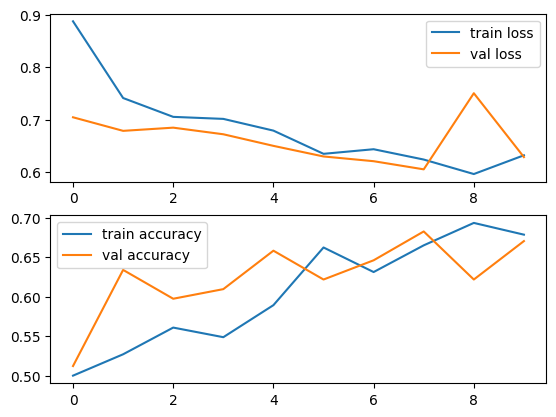

In [14]:
plt.subplot (2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss','val loss'])


plt.subplot (2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train accuracy','val accuracy'])

In [15]:
model.save('RedNeuronal.h5')

In [16]:
from tensorflow.keras.models import load_model
model = load_model('RedNeuronal.h5')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,244 (508.77 KB)

 Trainable params: 130,242 (508.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [17]:
print(xtest.shape)
print(ytest.shape)


(205, 13)
(205,)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[0.10468165 0.8953183 ]
 [0.53376675 0.46623325]
 [0.63881564 0.36118427]
 [0.1068209  0.8931791 ]
 [0.35504672 0.64495325]
 [0.67223233 0.32776767]
 [0.8374818  0.16251813]
 [0.5485268  0.4514731 ]
 [0.06393895 0.93606097]
 [0.56293195 0.43706802]
 [0.16135018 0.8386497 ]
 [0.8372328  0.16276714]
 [0.14302334 0.8569767 ]
 [0.03643594 0.96356416]
 [0.69317955 0.30682048]
 [0.08047764 0.91952235]
 [0.51073396 0.4892661 ]
 [0.01253943 0.98746055]
 [0.2916189  0.7083811 ]
 [0.5169673  0.48303273]
 [0.31112096 0.688879  ]
 [0.4838037  0.5161962 ]
 [0.24746776 0.75253224]
 [0.802834   0.19716592]
 [0.31112096 0.688879  ]
 [0.03591543 0.9640846 ]
 [0.4472087  0.5527914 ]
 [0.14208598 0.8579141 ]
 [0.7596201  0.24037988]
 [0.25482142 0.7451786 ]
 [0.46034673 0.5396533 ]
 [0.537379   0.46262097]
 [0.054865   0.945135  ]
 [0.53376675 0.46623325]
 [0.05206528 0.94793475]
 [0.13333648 0.8666635 ]
 [0.31112096 0.688879  ]
 [0.391966   0.60803396]
 [0.3723494 

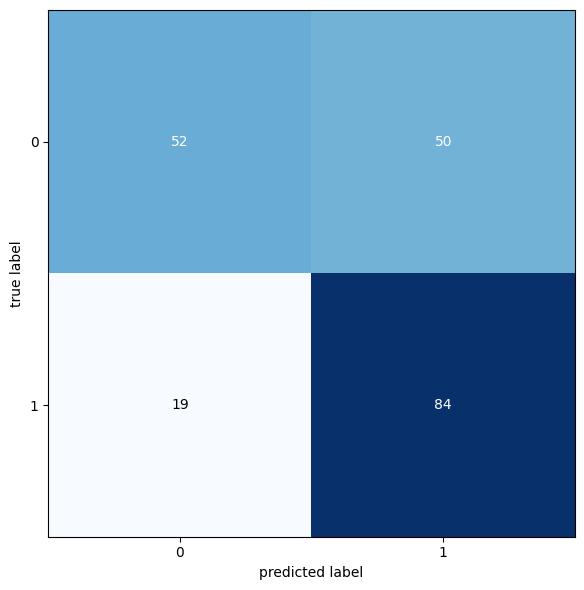

In [18]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

ypred = model.predict(xtest)
print(ypred)
matriz = confusion_matrix(ytest, np.argmax(ypred, axis = 1))

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6),show_normed=False)
plt.tight_layout()
print(matriz)

print(metrics.classification_report(ytest,np.argmax(ypred,axis=1),digits=4))